In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sensitivity_tests import *

import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
import os
import numpy as np
import math
import random
import sys
import itertools
from scipy import stats
import pandas as pd
sys.path.append("~/rankability_toolbox")
import pyrankability

from gurobipy import *
setParam("OutputFlag", 0)
setParam("Presolve", 0)

Academic license - for non-commercial use only


In [3]:
# Produces a pandas Series with the optimal rankings found from each permutation
def solve_all_permutations(D_orig):
    perms = list(itertools.permutations(range(D_orig.shape[0])))
    P_elems = []
    for perm in tqdm(perms):
        D_permuted = D_orig[perm,:][:,perm]
        k, details = pyrankability.lop.bilp(D_permuted)
        elem = list(details["P"][0])
        for i in range(len(elem)):
            elem[i] = perm[elem[i]]
        P_elems.append(str(elem))
    return pd.Series(P_elems)

# Checks if the frequencies are uniform or not
def check_freqs(freqs):
    if len(freqs.unique()) > 1:
        print(freqs)
        plt.bar(range(1, len(freqs)+1), height=freqs.values)
        plt.show()
        return False
    else:
        print("Perfectly balanced, as all things should be.")
        print("All {0} elements produced by {1} permutations".format(len(freqs), freqs.unique()[0]), flush=True)
        return True

# Generates random noisy D matrices and checks for uniform frequncy
def test_rand_D(noise_gen, num_attempts):
    for i in range(num_attempts):
        D2 = noise_gen.apply_noise(D)
        print(D2)
        P_elems_series = solve_all_permutations(D2)
        freqs = P_elems_series.value_counts()
        balanced = check_freqs(freqs)

## Perfect Dominance with Constant # of Ties

In [4]:
n_items = 7
n_ties = 4

# Create perfect binary dominance
D = PerfectBinarySource(n_items).init_D()

# Tie-up the bottom n_ties items
for i in range(n_ties):
    D[n_items-i-1] = 0

D

array([[0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [5]:
n_ties_series = solve_all_permutations(D)
freqs = n_ties_series.value_counts()
check_freqs(freqs)

100%|██████████| 5040/5040 [00:17<00:00, 287.00it/s]

Perfectly balanced, as all things should be.
All 24 elements produced by 210 permutations


True

## Re-initialize D

In [6]:
D = PerfectBinarySource(n_items).init_D()
D

array([[0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0]])

## Swap Noise

  1%|          | 26/5040 [00:00<00:20, 249.88it/s]

[[0 0 1 0 1 1 0]
 [1 0 1 0 0 1 1]
 [0 0 0 1 1 1 0]
 [1 1 0 0 1 1 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [1 0 1 1 1 1 0]]


100%|██████████| 5040/5040 [00:20<00:00, 245.60it/s]


[6, 3, 1, 0, 2, 5, 4]    1237
[1, 6, 3, 0, 2, 5, 4]    1136
[1, 6, 2, 3, 0, 5, 4]     993
[1, 6, 0, 2, 3, 5, 4]     856
[3, 1, 6, 0, 2, 5, 4]     818
dtype: int64


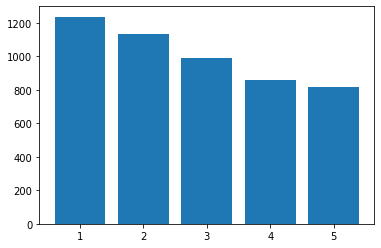

  0%|          | 0/5040 [00:00<?, ?it/s]

[[0 1 0 1 0 1 0]
 [0 0 0 1 0 1 1]
 [1 1 0 1 0 1 0]
 [0 0 0 0 0 1 1]
 [1 1 1 1 0 0 0]
 [0 0 0 0 1 0 1]
 [1 0 1 0 1 0 0]]


100%|██████████| 5040/5040 [00:20<00:00, 245.84it/s]


[4, 2, 0, 1, 3, 5, 6]    3813
[6, 4, 2, 0, 1, 3, 5]    1227
dtype: int64


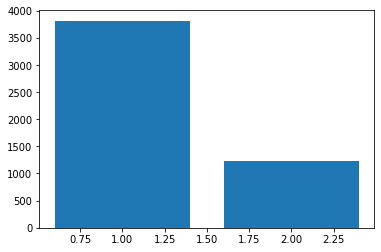

  0%|          | 0/5040 [00:00<?, ?it/s]

[[0 1 0 1 1 1 0]
 [0 0 0 1 0 0 1]
 [1 1 0 1 0 1 1]
 [0 0 0 0 1 0 0]
 [0 1 1 0 0 1 0]
 [0 1 0 1 0 0 0]
 [1 0 0 1 1 1 0]]


100%|██████████| 5040/5040 [00:20<00:00, 244.05it/s]

Perfectly balanced, as all things should be.
All 1 elements produced by 5040 permutations



  1%|          | 27/5040 [00:00<00:18, 268.45it/s]

[[0 1 1 1 0 0 1]
 [0 0 0 0 0 1 1]
 [0 1 0 1 1 0 0]
 [0 1 0 0 1 0 1]
 [1 1 0 0 0 1 0]
 [1 0 1 1 0 0 0]
 [0 0 1 0 1 1 0]]


100%|██████████| 5040/5040 [00:20<00:00, 251.93it/s]


[0, 6, 5, 2, 3, 4, 1]    639
[0, 2, 3, 1, 6, 4, 5]    581
[0, 6, 2, 3, 4, 1, 5]    569
[0, 2, 3, 6, 4, 1, 5]    466
[4, 5, 0, 2, 3, 1, 6]    399
[0, 2, 3, 4, 1, 6, 5]    377
[0, 3, 6, 2, 4, 1, 5]    373
[6, 5, 0, 2, 3, 4, 1]    328
[6, 4, 5, 0, 2, 3, 1]    285
[5, 0, 2, 3, 4, 1, 6]    236
[5, 0, 2, 3, 1, 6, 4]    217
[5, 0, 2, 3, 6, 4, 1]    206
[5, 0, 3, 6, 2, 4, 1]    187
[5, 0, 6, 2, 3, 4, 1]    177
dtype: int64


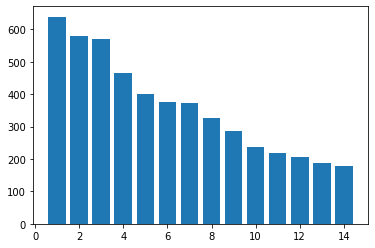

In [7]:
test_rand_D(SwapNoise(0.5), 4)

## Binary Flip Noise

[[0 1 0 1 0 0 0]
 [0 0 1 0 1 0 1]
 [1 1 0 1 0 1 0]
 [0 0 0 0 1 1 0]
 [1 1 1 1 0 1 1]
 [1 1 1 0 0 0 0]
 [1 0 0 0 1 0 0]]


100%|██████████| 5040/5040 [00:20<00:00, 244.87it/s]


[4, 2, 0, 3, 5, 1, 6]    880
[4, 5, 1, 6, 2, 0, 3]    442
[4, 5, 1, 2, 6, 0, 3]    416
[4, 2, 3, 5, 0, 1, 6]    307
[4, 2, 3, 5, 1, 6, 0]    305
[4, 5, 2, 0, 3, 1, 6]    273
[6, 4, 2, 0, 3, 5, 1]    249
[4, 2, 3, 6, 5, 0, 1]    242
[4, 2, 5, 1, 6, 0, 3]    210
[6, 4, 2, 3, 5, 0, 1]    172
[4, 5, 6, 2, 0, 3, 1]    124
[4, 5, 2, 0, 1, 6, 3]    112
[6, 4, 5, 2, 0, 1, 3]    108
[4, 2, 3, 5, 6, 0, 1]    100
[4, 2, 6, 0, 3, 5, 1]     94
[6, 4, 2, 5, 0, 1, 3]     91
[6, 4, 5, 2, 0, 3, 1]     88
[4, 5, 6, 2, 0, 1, 3]     85
[4, 2, 5, 0, 1, 6, 3]     65
[4, 6, 2, 0, 3, 5, 1]     59
[4, 2, 6, 5, 0, 1, 3]     57
[4, 2, 5, 0, 3, 1, 6]     56
[4, 2, 6, 3, 5, 0, 1]     54
[4, 5, 2, 6, 0, 3, 1]     53
[4, 5, 2, 1, 6, 0, 3]     47
[4, 5, 2, 0, 1, 3, 6]     43
[4, 2, 5, 6, 0, 3, 1]     43
[4, 6, 2, 3, 5, 0, 1]     38
[4, 2, 5, 0, 1, 3, 6]     32
[4, 2, 5, 6, 0, 1, 3]     30
[4, 2, 6, 5, 0, 3, 1]     30
[4, 5, 2, 6, 0, 1, 3]     30
[6, 4, 2, 5, 0, 3, 1]     28
[4, 6, 5, 2, 0, 1, 3]     27
[4, 6, 2, 5, 0

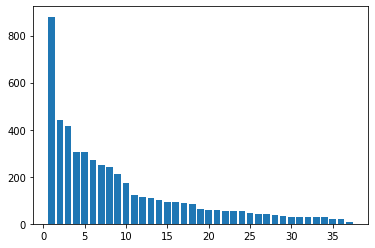

  0%|          | 0/5040 [00:00<?, ?it/s]

[[0 1 1 1 1 0 1]
 [0 0 0 0 1 1 0]
 [1 1 0 0 0 0 0]
 [1 0 1 0 1 0 1]
 [1 0 1 1 0 0 1]
 [1 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]]


100%|██████████| 5040/5040 [00:21<00:00, 236.01it/s]


[4, 3, 2, 5, 0, 6, 1]    593
[3, 4, 2, 5, 0, 6, 1]    584
[5, 0, 4, 3, 6, 2, 1]    369
[5, 0, 3, 4, 6, 2, 1]    362
[4, 5, 0, 3, 6, 2, 1]    313
[3, 5, 0, 4, 6, 2, 1]    311
[5, 0, 4, 3, 2, 6, 1]    266
[5, 0, 3, 4, 2, 6, 1]    264
[4, 3, 5, 0, 6, 2, 1]    210
[3, 4, 5, 0, 6, 2, 1]    206
[5, 4, 3, 2, 0, 6, 1]    157
[5, 3, 4, 2, 0, 6, 1]    155
[5, 4, 3, 0, 6, 2, 1]    116
[4, 5, 0, 3, 2, 6, 1]    115
[4, 5, 3, 0, 6, 2, 1]    114
[5, 3, 4, 0, 6, 2, 1]    114
[5, 4, 0, 3, 6, 2, 1]    114
[5, 3, 0, 4, 6, 2, 1]    113
[3, 5, 0, 4, 2, 6, 1]    113
[3, 5, 4, 0, 6, 2, 1]    112
[4, 5, 3, 2, 0, 6, 1]     68
[3, 5, 4, 2, 0, 6, 1]     66
[4, 3, 5, 0, 2, 6, 1]     35
[3, 4, 5, 0, 2, 6, 1]     35
[5, 4, 0, 3, 2, 6, 1]     26
[5, 3, 0, 4, 2, 6, 1]     25
[4, 3, 5, 2, 0, 6, 1]     21
[3, 4, 5, 2, 0, 6, 1]     21
[4, 5, 3, 0, 2, 6, 1]     11
[5, 4, 3, 0, 2, 6, 1]     11
[5, 3, 4, 0, 2, 6, 1]     10
[3, 5, 4, 0, 2, 6, 1]     10
dtype: int64


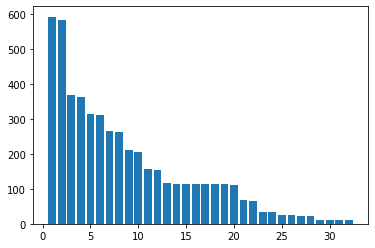

  0%|          | 0/5040 [00:00<?, ?it/s]

[[0 1 1 0 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 0 1 1 1]
 [0 1 1 0 1 0 0]
 [0 0 1 1 0 0 1]
 [0 1 0 1 0 0 0]
 [1 1 1 0 0 0 0]]


100%|██████████| 5040/5040 [00:21<00:00, 233.73it/s]


[3, 6, 0, 2, 5, 1, 4]    488
[6, 0, 2, 5, 1, 4, 3]    443
[6, 0, 5, 1, 4, 3, 2]    418
[6, 0, 2, 5, 3, 1, 4]    295
[6, 0, 5, 1, 3, 2, 4]    273
                        ... 
[5, 6, 3, 0, 1, 2, 4]      6
[4, 5, 6, 3, 0, 1, 2]      5
[6, 5, 0, 3, 1, 4, 2]      5
[4, 6, 5, 0, 3, 1, 2]      4
[6, 5, 0, 3, 1, 2, 4]      2
Length: 63, dtype: int64


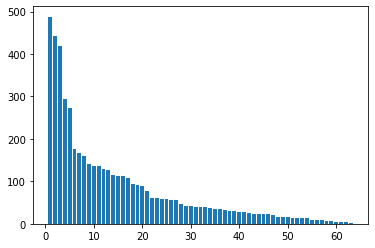

  0%|          | 24/5040 [00:00<00:21, 232.70it/s]

[[0 0 1 0 1 1 0]
 [0 0 0 0 1 0 0]
 [1 1 0 0 1 1 0]
 [0 0 0 0 0 1 0]
 [1 0 0 1 0 0 1]
 [0 0 0 1 1 0 1]
 [1 1 1 0 0 0 0]]


100%|██████████| 5040/5040 [00:20<00:00, 241.15it/s]


[6, 2, 1, 0, 5, 4, 3]    1668
[6, 2, 0, 5, 1, 4, 3]    1256
[6, 0, 2, 5, 1, 4, 3]    1244
[6, 0, 2, 1, 5, 4, 3]     654
[6, 2, 0, 1, 5, 4, 3]     218
dtype: int64


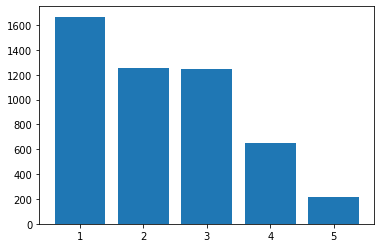

In [8]:
test_rand_D(BinaryFlipNoise(0.5), 4)

## Normal Resampling Noise

  0%|          | 0/5040 [00:00<?, ?it/s]

[[0 1 0 0 1 0 1]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 1 0]
 [0 0 0 0 1 1 0]
 [0 0 1 0 0 1 1]
 [1 0 0 1 0 0 1]
 [1 0 0 0 0 0 0]]


100%|██████████| 5040/5040 [00:22<00:00, 225.65it/s]


[0, 1, 4, 2, 5, 6, 3]    1628
[0, 1, 2, 3, 4, 5, 6]    1465
[0, 1, 3, 4, 2, 5, 6]    1051
[0, 1, 4, 2, 5, 3, 6]     543
[0, 1, 4, 2, 3, 5, 6]     353
dtype: int64


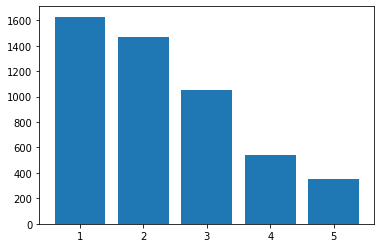

  0%|          | 0/5040 [00:00<?, ?it/s]

[[0 1 1 1 1 0 1]
 [0 0 1 0 1 1 1]
 [0 0 0 1 0 0 1]
 [0 0 0 0 1 1 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0]]


100%|██████████| 5040/5040 [00:21<00:00, 238.40it/s]

Perfectly balanced, as all things should be.
All 1 elements produced by 5040 permutations



  1%|          | 26/5040 [00:00<00:19, 251.93it/s]

[[0 0 1 0 0 0 1]
 [0 0 0 1 0 1 1]
 [0 1 0 1 1 1 1]
 [0 1 0 0 1 0 0]
 [0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]]


100%|██████████| 5040/5040 [00:21<00:00, 239.73it/s]


[0, 2, 3, 4, 1, 5, 6]    2469
[0, 2, 6, 3, 4, 1, 5]    1020
[0, 2, 3, 4, 1, 6, 5]     850
[0, 2, 3, 4, 6, 1, 5]     434
[0, 2, 3, 6, 4, 1, 5]     267
dtype: int64


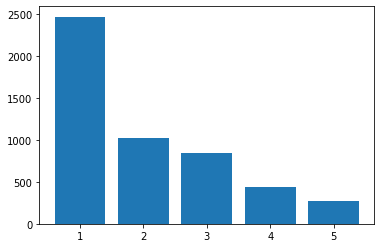

  0%|          | 0/5040 [00:00<?, ?it/s]

[[0 1 0 1 0 1 1]
 [0 0 0 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 1]
 [0 1 0 0 0 1 0]
 [0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0]]


100%|██████████| 5040/5040 [00:20<00:00, 246.05it/s]


[0, 1, 2, 3, 4, 5, 6]    2506
[2, 0, 1, 3, 4, 5, 6]    1680
[0, 2, 1, 3, 4, 5, 6]     854
dtype: int64


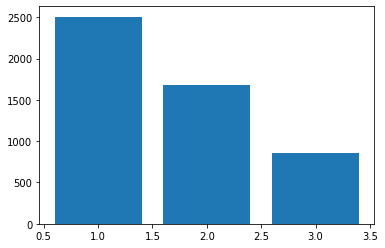

In [9]:
test_rand_D(NormalResamplingNoise(0.5), 4)